# Brazil - Analysis of the economy by state

**Goals** : 
- Analysis of global changes. 
- Compare the region of Rio de Janeiro to other one.

**Factors** : GDP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

gdp_per_region = pd.read_csv('datasets_full/Rio/brazil_gdp.csv', delimiter = ',')

In [2]:
gdp_per_region

,state,region,year,value
0,Rondônia,Madeira-Guaporé,2002,2.903643e+06
1,Rondônia,Madeira-Guaporé,2003,3.542367e+06
2,Rondônia,Madeira-Guaporé,2004,4.328271e+06
3,Rondônia,Madeira-Guaporé,2005,4.871566e+06
4,Rondônia,Madeira-Guaporé,2006,5.210186e+06
...,...,...,...,...
2187,Distrito Federal,Distrito Federal,2013,1.759067e+08
2188,Distrito Federal,Distrito Federal,2014,1.974321e+08
2189,Distrito Federal,Distrito Federal,2015,2.156129e+08
2190,Distrito Federal,Distrito Federal,2016,2.355400e+08


In [3]:
gdp_per_region['state'].unique().tolist() #27 regions

['Rondônia',
 'Acre',
 'Amazonas',
 'Roraima',
 'Pará',
 'Amapá',
 'Tocantins',
 'Maranhão',
 'Piauí',
 'Ceará',
 'Rio Grande do Norte',
 'Paraíba',
 'Pernambuco',
 'Alagoas',
 'Sergipe',
 'Bahia',
 'Minas Gerais',
 'Espírito Santo',
 'Rio de Janeiro',
 'São Paulo',
 'Paraná',
 'Santa Catarina',
 'Rio Grande do Sul',
 'Mato Grosso do Sul',
 'Mato Grosso',
 'Goiás',
 'Distrito Federal']

In [4]:
gdp_per_state = gdp_per_region.groupby(['state','year']).sum()

In [5]:
gdp_per_state 

value
state     year             
Acre      2002   2971301.28
          2003   3377234.25
          2004   3784002.58
          2005   4300581.27
          2006   4661806.96
...                     ...
Tocantins 2013  23796656.41
          2014  26189322.64
          2015  28930290.80
          2016  31584816.20
          2017  34101687.37

[432 rows x 1 columns]

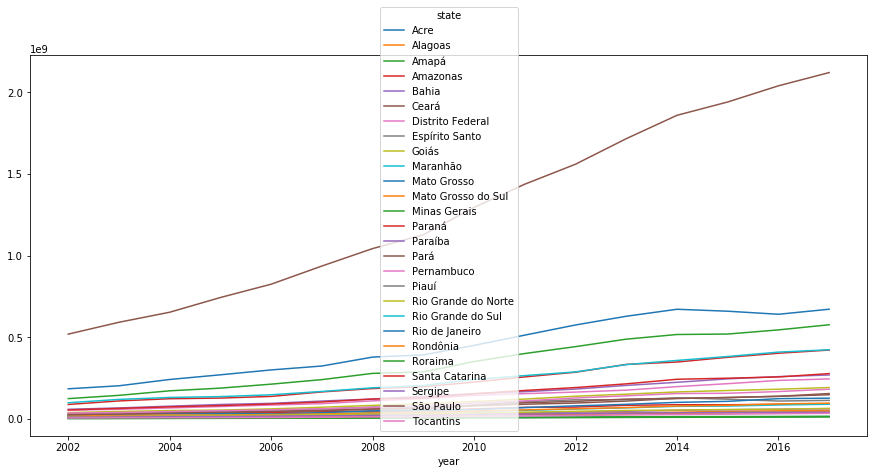

In [6]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
gdp_per_region.groupby(['year','state']).sum()['value'].unstack().plot(ax=ax)

In [7]:
gdp_per_state.to_csv('brazil_gdp_per_state.csv')

Continuation of the analysis with a new CSV (we add the variation of the GDP (year_n - year_n-1 / year_n-1)

Calculus of variation on excel of the GDB for each region and per year

In [8]:
gdp_per_state_var = pd.read_csv('brazil_gdp_per_state_modif.csv', delimiter = ';')

In [9]:
gdp_per_state_var = gdp_per_state_var.drop(gdp_per_state_var.columns[2], axis='columns')

gdp_per_state_var

,state,year,variation
0,Acre,2002,0.000000
1,Acre,2003,0.136618
2,Acre,2004,0.120444
3,Acre,2005,0.136516
4,Acre,2006,0.083995
...,...,...,...
427,Tocantins,2013,0.150462
428,Tocantins,2014,0.100546
429,Tocantins,2015,0.104660
430,Tocantins,2016,0.091756


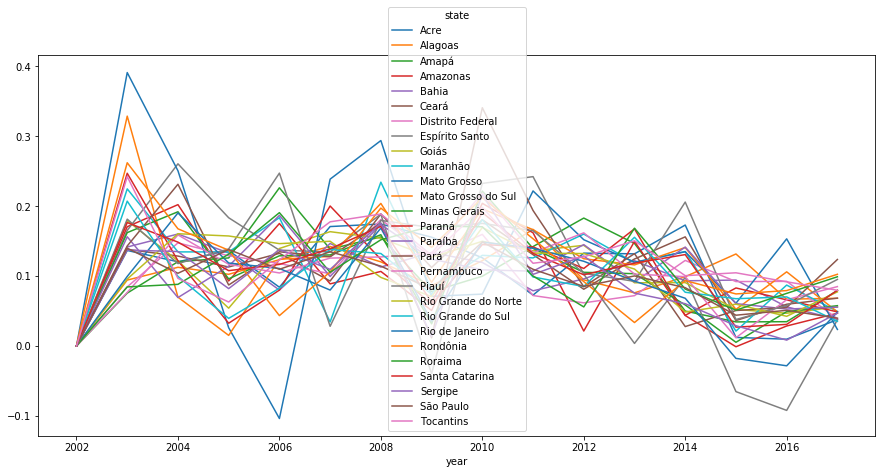

In [10]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
gdp_per_state_var.groupby(['year','state']).sum()['variation'].unstack().plot(ax=ax)

In [11]:
gdp_var_rio = gdp_per_state_var[gdp_per_state_var['state'] == 'Rio de Janeiro']

In [12]:
gdp_var_rio

,state,year,variation
320,Rio de Janeiro,2002,0.000000
321,Rio de Janeiro,2003,0.099451
322,Rio de Janeiro,2004,0.190317
323,Rio de Janeiro,2005,0.118667
324,Rio de Janeiro,2006,0.110841
325,Rio de Janeiro,2007,0.079937
326,Rio de Janeiro,2008,0.168637
327,Rio de Janeiro,2009,0.035331
328,Rio de Janeiro,2010,0.148620
329,Rio de Janeiro,2011,0.139844


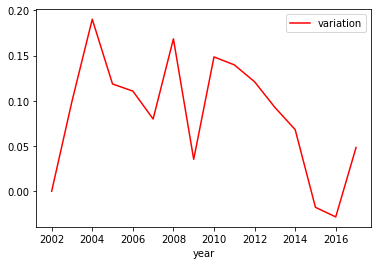

In [13]:
gdp_var_rio.plot(x='year', y='variation', c='red')

We will restrict to [2012,2017]

In [14]:
gdp_per_state_var_rest = gdp_per_state_var[gdp_per_state_var['year']>=2012]

gdp_per_state_var_rest

,state,year,variation
10,Acre,2012,0.132801
11,Acre,2013,0.131783
12,Acre,2014,0.172981
13,Acre,2015,0.012193
14,Acre,2016,0.009648
...,...,...,...
427,Tocantins,2013,0.150462
428,Tocantins,2014,0.100546
429,Tocantins,2015,0.104660
430,Tocantins,2016,0.091756


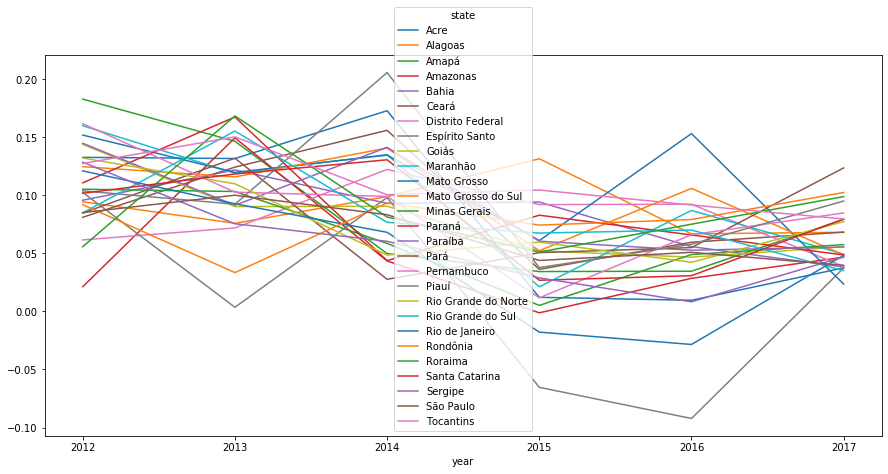

In [15]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
gdp_per_state_var_rest.groupby(['year','state']).sum()['variation'].unstack().plot(ax=ax)

In [16]:
gdp_var_rio_rest = gdp_var_rio[gdp_var_rio['year']>=2012]

gdp_var_rio_rest

,state,year,variation
330,Rio de Janeiro,2012,0.121141
331,Rio de Janeiro,2013,0.092786
332,Rio de Janeiro,2014,0.068209
333,Rio de Janeiro,2015,-0.017789
334,Rio de Janeiro,2016,-0.028428
335,Rio de Janeiro,2017,0.048347


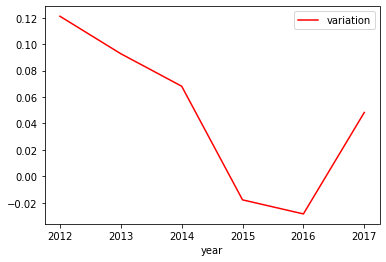

In [17]:
gdp_var_rio_rest.plot(x='year', y='variation', c='red')